# NumPy

## Overview

[NumPy](https://numpy.org/) is a library for Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. **NumPy is the fundamental package for scientific computing with Python**.

NumPy contains, among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

The most up-to-date **NumPy documentation** can be found at [Overview — NumPy v1.19.dev0 Manual](https://numpy.org/devdocs/). It includes a user guide, full reference documentation, and more.

To use NumPy and create plots, we need the following import statements:

In [31]:
import numpy as np
import matplotlib.pyplot as pp

%matplotlib inline

## NumPy Arrays

**NumPy arrays are N-dimensional array type (*ndarray*) objects**. The array type describes a **collection of "items" of the same type**. The items can be indexed using zero-based indexing. All *ndarrays* are homogenous: every item takes up the same size block of memory, and all blocks are interpreted in exactly the same way.

**How are NumPy arrays different from Python containers?**

- NumPy arrays can only contain values of the same type, whereas Python lists can contain values of different types.
- NumPy arrays use contiguous blocks of memory with one address, while Python lists are arrays of addresses to Python objects.
- Computations on large lists of numbers are more efficient with NumPy arrays than with Python containers.

### Construction

The simplest way to **create a NumPy array is by converting a Python list**.

Let us create a 1D array.

In [52]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

The **array type** was inferred by NumPy based on the contents of the list. However, we can also specify the type.

In [53]:
x.dtype

dtype('int64')

In [54]:
x = np.array([1, 2, 3, 4, 5], dtype=np.float64)
x

array([1., 2., 3., 4., 5.])

The **number of dimensions (*1D, 2D, etc.*), shape (*nrows, ncols*), and size (*num elements*) of an array** is given by:

In [55]:
x.ndim, x.shape, x.size

(1, (5,), 5)

For a 2D array, we have:

In [56]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
A

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [57]:
A.ndim, A.shape, A.size

(2, (2, 4), 8)

There are **other ways to create arrays**.

We can **create an empty array**:

In [58]:
np.empty((3,3), 'd')

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

We can **create an array of zeros**:

In [59]:
np.zeros((3,3), 'd')

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

We can **create regularly-spaced arrays of numbers**:

- We can use `linspace()` to choose the number of elements between two extrema (e.g., 5 elements between 0 and 10).
- We can use `arange()` to choose a *step* to go between the two given elements.

In [81]:
np.linspace(0,10,21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [83]:
np.arange(0, 22, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

We can create **arrays of random numbers**:

In [62]:
np.random.standard_normal((2,3))

array([[-1.45411018,  0.76598243, -2.0109183 ],
       [-0.06689175,  0.97187434, -1.60847572]])

We can also create new arrays by composing existing ones if they have compatible shapes.

In [63]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]], 'i')
A

array([[1, 2, 3, 4],
       [5, 6, 7, 8]], dtype=int32)

In [64]:
B = np.zeros((2,4), 'i')
B

array([[0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

In [65]:
np.vstack([A,B])  # stack them vertically

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

In [66]:
np.hstack([A,B])  # stack them horizontally

array([[1, 2, 3, 4, 0, 0, 0, 0],
       [5, 6, 7, 8, 0, 0, 0, 0]], dtype=int32)

We can **save and load NumPy arrays to and from disk** very simply. 

In [67]:
np.save('file_io/saved_array.npy', A)  # saving array 'a'

In [68]:
C = np.load('file_io/saved_array.npy')

In [69]:
C

array([[1, 2, 3, 4],
       [5, 6, 7, 8]], dtype=int32)

### Indexing

**Indexing of NumPy arrays** is an extension of indexing for Python lists.

In [190]:
x = np.array([5, 6, 7, 8, 9, 10])
x

array([ 5,  6,  7,  8,  9, 10])

In [191]:
x[1]

6

**For 2D arrays, use two indices separated by a comma**. The first index refers to the row, the second to the column.

In [192]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
A

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [193]:
A[0, 3]

4

**We can use a list of indices, or even a NumPy array, to select only certain elements**. In the following example, we are selecting the first and last element of the array.

In [207]:
x = np.array([5, 6, 7, 8, 9, 10])
x

array([ 5,  6,  7,  8,  9, 10])

In [208]:
x[[0,len(x) - 1]]

array([ 5, 10])

**We can also use a list or array of Boolean values to choose which elements to include and which not to**.

In [209]:
bool_index = x % 2 == 0
bool_index

array([False,  True, False,  True, False,  True])

In [210]:
evenx = x[bool_index]
evenx

array([ 6,  8, 10])

In [211]:
bool_index = x >= 8
bool_index

array([False, False, False,  True,  True,  True])

In [213]:
x[bool_index]

array([ 8,  9, 10])

**We can use this kind of indexing to modify only carefully selected parts of an array**.

In [216]:
x[x >= 8] = x[x >= 8] * 2
x

array([ 5,  6,  7, 32, 36, 40])

### Slicing

**Slicing of NumPy arrays** also works in a similar way to Python lists. **One important difference** is that slicing a Python list yields a new list, while NumPy slices yield views onto the same piece of memory. So, if we create a new NumPy array by slicing and we modify its values, we end up modifying the entire source array.

In [164]:
x = np.array([5, 6, 7, 8, 9, 10, 11, 12])
x

array([ 5,  6,  7,  8,  9, 10, 11, 12])

In [151]:
x[1:3]

array([6, 7])

In [165]:
x[1::2]

array([ 6,  8, 10, 12])

**For 2D arrays, we can slice in one or both dimensions**.

In [160]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [0, 0, 0, 0], [1, 1, 1, 1]])
A

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [0, 0, 0, 0],
       [1, 1, 1, 1]])

In [161]:
A[1:3]

array([[5, 6, 7, 8],
       [0, 0, 0, 0]])

In [162]:
A[1:4, 2]

array([7, 0, 1])

In [163]:
A[1:4, 2:4]

array([[7, 8],
       [0, 0],
       [1, 1]])

**Use the `copy()` method** to make a copy of a slice, so changes can be made to the slice without modifying the source array.

In [167]:
slice_copy = A[1:4, 2:4].copy()
slice_copy

array([[7, 8],
       [0, 0],
       [1, 1]])

### Conversion

We can **turn a row vector into a column vector** by adding a dimension parameter using [numpy.newaxis](https://numpy.org/devdocs/reference/constants.html?highlight=newaxis#numpy.newaxis).

In [135]:
x = np.array([1, 2, 5, 4])
x

array([1, 2, 5, 4])

In [134]:
x[:, np.newaxis]

array([[1],
       [2],
       [5],
       [4]])

We can **take the transpose of an array**:

In [70]:
A

array([[1, 2, 3, 4],
       [5, 6, 7, 8]], dtype=int32)

In [71]:
A.transpose()

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]], dtype=int32)

### Doing Math

[Mathematical operations](https://numpy.org/devdocs/reference/arrays.ndarray.html#arithmetic-matrix-multiplication-and-comparison-operations) on [ndarrays](https://numpy.org/devdocs/reference/generated/numpy.ndarray.html#numpy.ndarray) are defined as element-wise operations, and generally yield ndarray objects as results. Operations include **unary, arithmetic and comparison, plotting with [Matplotlib](https://matplotlib.org/contents.html#), and linear algebra computations**.

Each operation is equivalent to the corresponding *universal function* in NumPy. A [universal function](https://numpy.org/devdocs/reference/ufuncs.html#ufuncs) ([*ufunc*](https://numpy.org/devdocs/glossary.html#term-ufunc)) is a fast element-wise, vectorized array operation.

Let us see some examples:

In [84]:
x = np.linspace(0,10,50)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [85]:
sinx = np.sin(x)
sinx

array([ 0.        ,  0.20266794,  0.39692415,  0.57470604,  0.72863478,
        0.85232157,  0.94063279,  0.98990308,  0.99808748,  0.96484631,
        0.89155923,  0.78126802,  0.63855032,  0.46932961,  0.2806294 ,
        0.08028167, -0.12339814, -0.32195632, -0.50715171, -0.67129779,
       -0.80758169, -0.91034694, -0.97532829, -0.99982867, -0.9828312 ,
       -0.92504137, -0.82885774, -0.6982724 , -0.53870529, -0.35677924,
       -0.16004509,  0.04333173,  0.24491007,  0.43632343,  0.6096272 ,
        0.75762842,  0.8741843 ,  0.9544572 ,  0.99511539,  0.99447137,
        0.95255185,  0.8710967 ,  0.75348673,  0.60460332,  0.43062587,
        0.23877532,  0.0370144 , -0.16628279, -0.36267843, -0.54402111])

In [87]:
cosx = np.cos(x)
cosx

array([ 1.        ,  0.97924752,  0.91785141,  0.81835992,  0.68490244,
        0.52301811,  0.33942593,  0.1417459 , -0.0618173 , -0.26281476,
       -0.45290412, -0.6241957 , -0.76958007, -0.88302305, -0.9598162 ,
       -0.99677222, -0.99235724, -0.94675453, -0.8618568 , -0.74118774,
       -0.58975572, -0.41384591, -0.22075945, -0.01851037,  0.18450698,
        0.37986637,  0.55945943,  0.71583215,  0.84249428,  0.93418872,
        0.98710971,  0.99906074,  0.9695458 ,  0.8997899 ,  0.79268826,
        0.65268613,  0.48559429,  0.29834787,  0.09871854, -0.10500809,
       -0.30437638, -0.49111153, -0.65746312, -0.79652673, -0.90253053,
       -0.97107484, -0.99931473, -0.98607811, -0.93191435, -0.83907153])

**We can plot a single function:**

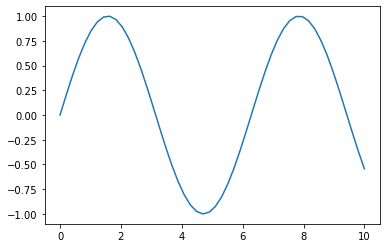

In [86]:
pp.plot(x, sinx)

We can also plot several functions together, [change line properties](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D), or [add a legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html?highlight=legend#matplotlib.pyplot.legend).

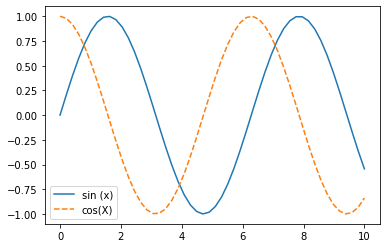

In [98]:
pp.plot(x, sinx)
pp.plot(x, cosx, '--')
pp.legend(['sin (x)', 'cos(X)'])

Just like we can apply a unary function, like `sin()` to a numeric array, we can also do arithmetic between them.

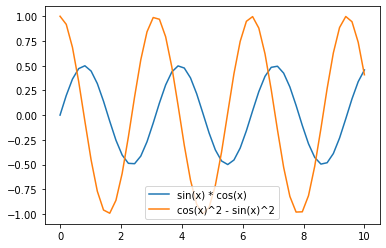

In [100]:
y = sinx * cosx
z = cosx**2 - sinx**2

pp.plot(x, y)
pp.plot(x, z)

pp.legend(['sin(x) * cos(x)', 'cos(x)^2 - sin(x)^2'])

### Broadcasting

NumPy supports operations between arrays of different shapes. This is known as [Broadcasting](https://numpy.org/devdocs/user/basics.broadcasting.html). The term describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

For example, adding a number to a vector, adds that number to every single element of the vector.

In [119]:
x = np.array([1, 2, 5, 4])
x + 1

array([2, 3, 6, 5])

In [125]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [0, 0, 0, 0]])
A

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [0, 0, 0, 0]])

If we add a row vector of size *n* to a matrix with the same number of columns, the vector is added element-wise to every row of the matrix. 

In [129]:
x + A

array([[ 2,  4,  8,  8],
       [ 6,  8, 12, 12],
       [ 1,  2,  5,  4]])

If we want to add a vector of size *n* to a matrix of size *nxm*, we must first turn the vector into a proper *nx1* column vector.

In [137]:
xcol = x[:3, np.newaxis]
xcol

array([[1],
       [2],
       [5]])

In [138]:
xcol + A

array([[ 2,  3,  4,  5],
       [ 7,  8,  9, 10],
       [ 5,  5,  5,  5]])

### Linear Algebra

Mathematical operations are normally applied to arrays element by element. This is not the case for Linear Algebra.

For example, we can find the [dot product](https://numpy.org/devdocs/reference/generated/numpy.dot.html?highlight=dot%20product) (or *scalar product*), of any two vectors, [cross product](https://numpy.org/devdocs/reference/generated/numpy.cross.html?highlight=cross%20product) of two vectors in R^3, or the [outer product](https://numpy.org/devdocs/reference/generated/numpy.outer.html?highlight=outer%20product) of any two vectors.

In [115]:
x = np.array([1, 2, 5, 4])
y = np.array([2, 4, 1, 0])

In [116]:
np.dot(x, y)

15

In [117]:
np.cross(x[:3], y[:3])

array([-18,   9,   0])

In [118]:
np.outer(x, y)

array([[ 2,  4,  1,  0],
       [ 4,  8,  2,  0],
       [10, 20,  5,  0],
       [ 8, 16,  4,  0]])

### Record Arrays

[Structured arrays](https://numpy.org/devdocs/user/basics.rec.html?highlight=structured%20arrays#module-numpy.doc.structured_arrays), also known as **record arrays** are *ndarrays* whose data type is a composition of simpler data types organized as a sequence of named fields. Structured data types are designed to be able to mimic **structs in the C language**, and share a similar memory layout.

Record arrays are very similar to pandas DataFrames in Python. They are **often useful to represent non-homogeneous tabular data** and they can be saved and loaded quickly to and from disk.

In [218]:
student_records = np.array([('John Turner', 2, 3.8), ('Kai Brooks', 3, 4.0)], dtype=[('name', 'U10'), ('year', 'i4'), ('GPA', 'f4')])
student_records

array([('John Turne', 2, 3.8), ('Kai Brooks', 3, 4. )],
      dtype=[('name', '<U10'), ('year', '<i4'), ('GPA', '<f4')])

Indexing the structured array at some position yields a structure:

In [221]:
student_records[1]

('Kai Brooks', 3, 4.)

We can access and modify individual fields of a structured array by indexing with the field name:

In [223]:
student_records['year']

array([2, 3], dtype=int32)

### Dates

NumPy 1.7+ offers core array data types which natively **support datetime functionality**. The data type is called **datetime64**. Python already has a *datetime* library, but it's somewhat limited.

In [229]:
np.datetime64('2020')

numpy.datetime64('2020')

In [230]:
np.datetime64('2020-02')

numpy.datetime64('2020-02')

In [233]:
np.datetime64('2020-02-04 10:00:00')

numpy.datetime64('2020-02-04T10:00:00')

We can **compare dates**:

In [232]:
np.datetime64('2018-02-04') < np.datetime64('2020-02-04')

True

We can **subtract two datetimes, which results in a timedelta object**.

In [239]:
delta = np.datetime64('2020-02-04') - np.datetime64('2019-02-04')
delta

numpy.timedelta64(365,'D')

We can **add/subtract timedelta objects to dates to obtain dates in the future or the past**.

In [240]:
np.datetime64('2018-02-04') + delta

numpy.datetime64('2019-02-04')

In [241]:
np.datetime64('2020-02-04') - delta

numpy.datetime64('2019-02-04')

In [243]:
np.datetime64('2020-02-04 10:00:00') + np.timedelta64(7,'h')

numpy.datetime64('2020-02-04T17:00:00')

**Use the `astype()` method to convert a datetime64 object into a number**. This number represents the number of days since January 1, 1970.

In [245]:
np.datetime64('1970-01-01').astype(float)

0.0

In [246]:
np.datetime64('2020-02-04').astype(float)

18296.0

We can use datetime objects in common functions, such as range:

In [248]:
dates = np.arange(np.datetime64('2020-01-01'), np.datetime64('2020-03-01'))
dates

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29'],
      dtype='datetime64[D]')